# Market vs Non-Market

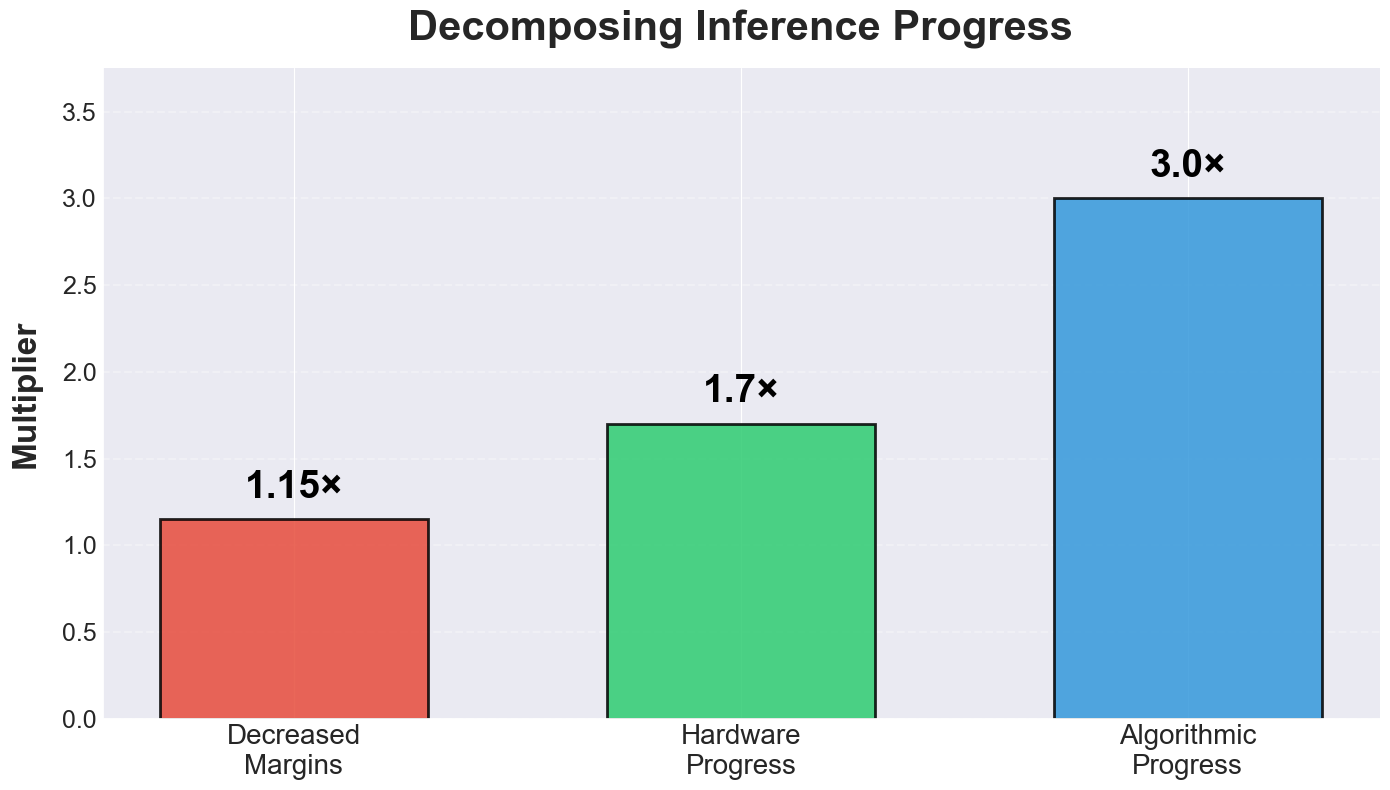

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Data for the bar graph - ordered by multiplier size (smallest to largest)
categories = ['Decreased\nMargins', 'Hardware\nProgress', 'Algorithmic\nProgress']
multipliers = [1.15, 1.7, 3.0]

# Modern color palette - matched to order
colors = ['#E74C3C', '#2ECC71', '#3498DB']

# Create figure with better styling
plt.style.use('seaborn-v0_8-darkgrid')
fig, ax = plt.subplots(figsize=(14, 8))

# Create bars with edge effects
bars = ax.bar(categories, multipliers, color=colors, 
              edgecolor='black', linewidth=2, alpha=0.85, width=0.6)

# Add value labels on top of each bar with larger font
for i, (bar, mult) in enumerate(zip(bars, multipliers)):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.08,
            f'{mult}×', ha='center', va='bottom', 
            fontsize=28, fontweight='bold', color='black')

# Customize the plot with larger fonts
ax.set_ylabel('Multiplier', fontsize=24, fontweight='bold', labelpad=15)
ax.set_title('Decomposing Inference Progress', fontsize=30, fontweight='bold', pad=20)
ax.set_ylim(0, max(multipliers) * 1.25)

# Style the tick labels
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=18)

# Add a subtle grid
ax.grid(axis='y', alpha=0.3, linestyle='--', linewidth=1.5)
ax.set_axisbelow(True)

# Remove top and right spines for cleaner look
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)

plt.tight_layout()
plt.show()